In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from joblib import dump
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('../dataset/online_shoppers_intention.csv')

### Rad sa nedostajućim vrednostima

In [3]:
dataset.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [4]:
# Vidimo da nema nedostajucih vrednosti

In [5]:
dataset.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

### Matrica korelacije 

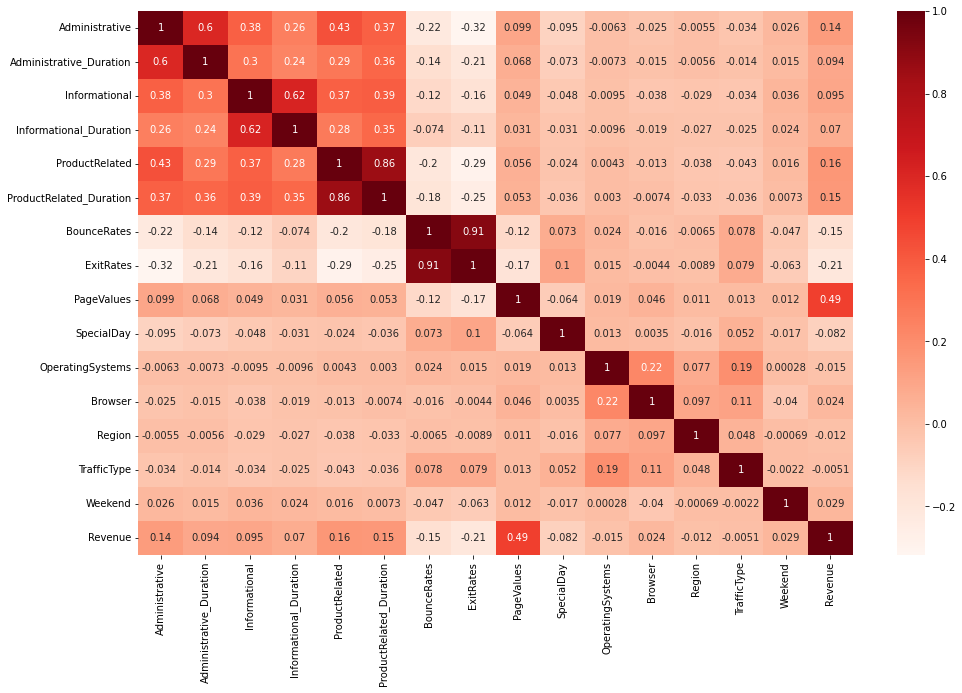

In [6]:
plt.figure(figsize = (16,10))
corr_matrix = dataset.corr(numeric_only=True)
hm=sns.heatmap(corr_matrix, cmap = plt.cm.Reds, annot=True)

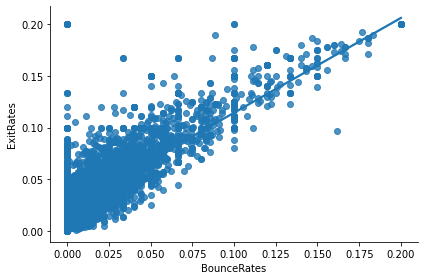

In [7]:
ax = sns.lmplot(x="BounceRates", y="ExitRates", data=dataset, height=4, aspect=1.5)

### Vidimo na heatmapi atribute sa visokom korelacijom i izbacujemo ih

In [8]:
# To su atributi ProductRelated i ProductRelated Duration (0.86)
# I atributi BounceRates i ExitRates (0.91)

dataset = dataset.drop(columns=['ProductRelated', 'BounceRates'])

### Transformisanje kategoričkih atributa

In [9]:
new_dataset = pd.get_dummies(dataset, columns = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend'])

In [10]:
new_dataset.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated_Duration,ExitRates,PageValues,SpecialDay,Revenue,Month_Aug,...,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
0,0,0.0,0,0.0,0.000000,0.20,0.0,0.0,False,False,...,False,False,False,False,False,False,False,True,True,False
1,0,0.0,0,0.0,64.000000,0.10,0.0,0.0,False,False,...,False,False,False,False,False,False,False,True,True,False
2,0,0.0,0,0.0,0.000000,0.20,0.0,0.0,False,False,...,False,False,False,False,False,False,False,True,True,False
3,0,0.0,0,0.0,2.666667,0.14,0.0,0.0,False,False,...,False,False,False,False,False,False,False,True,True,False
4,0,0.0,0,0.0,627.500000,0.05,0.0,0.0,False,False,...,False,False,False,False,False,False,False,True,False,True


In [11]:
revenue = dataset['Revenue'].unique()
num_class = revenue.shape[0]
zipped = zip(revenue, range(num_class))
dictionary = dict(zipped)

new_dataset = new_dataset.replace(dictionary)
new_dataset.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated_Duration,ExitRates,PageValues,SpecialDay,Revenue,Month_Aug,...,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
0,0,0.0,0,0.0,0.000000,0.20,0.0,0.0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0.0,0,0.0,64.000000,0.10,0.0,0.0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,0,0.0,0,0.0,0.000000,0.20,0.0,0.0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,0.0,0,0.0,2.666667,0.14,0.0,0.0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,0,0.0,0,0.0,627.500000,0.05,0.0,0.0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [12]:
new_dataset.columns.values

array(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated_Duration', 'ExitRates',
       'PageValues', 'SpecialDay', 'Revenue', 'Month_Aug', 'Month_Dec',
       'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May',
       'Month_Nov', 'Month_Oct', 'Month_Sep', 'OperatingSystems_1',
       'OperatingSystems_2', 'OperatingSystems_3', 'OperatingSystems_4',
       'OperatingSystems_5', 'OperatingSystems_6', 'OperatingSystems_7',
       'OperatingSystems_8', 'Browser_1', 'Browser_2', 'Browser_3',
       'Browser_4', 'Browser_5', 'Browser_6', 'Browser_7', 'Browser_8',
       'Browser_9', 'Browser_10', 'Browser_11', 'Browser_12',
       'Browser_13', 'Region_1', 'Region_2', 'Region_3', 'Region_4',
       'Region_5', 'Region_6', 'Region_7', 'Region_8', 'Region_9',
       'TrafficType_1', 'TrafficType_2', 'TrafficType_3', 'TrafficType_4',
       'TrafficType_5', 'TrafficType_6', 'TrafficType_7', 'TrafficType_8',
       'Tra

In [13]:
new_dataset.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated_Duration,ExitRates,PageValues,SpecialDay,Revenue,Month_Aug,...,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,...,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,1194.746220,0.043073,5.889258,0.061427,0.154745,0.035118,...,0.000243,0.000081,0.000811,0.001379,0.016058,0.137388,0.006894,0.855718,0.767397,0.232603
std,3.321784,176.779107,1.270156,140.749294,1913.669288,0.048597,18.568437,0.198917,0.361676,0.184084,...,0.015597,0.009006,0.028468,0.037107,0.125705,0.344271,0.082745,0.351390,0.422509,0.422509
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,184.137500,0.014286,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,598.936905,0.025156,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,1464.157214,0.050000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,63973.522230,0.200000,361.763742,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Rad sa elementima van granica

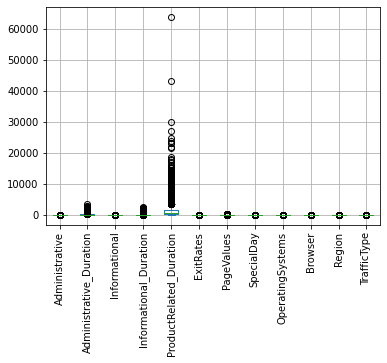

In [14]:
dataset.plot(kind="box")
plt.xticks(rotation=90)
plt.grid()
plt.show()

### Vidimo da Duration atributi imaju ekstremne elemente van granica koje cemo pokusati da resimo

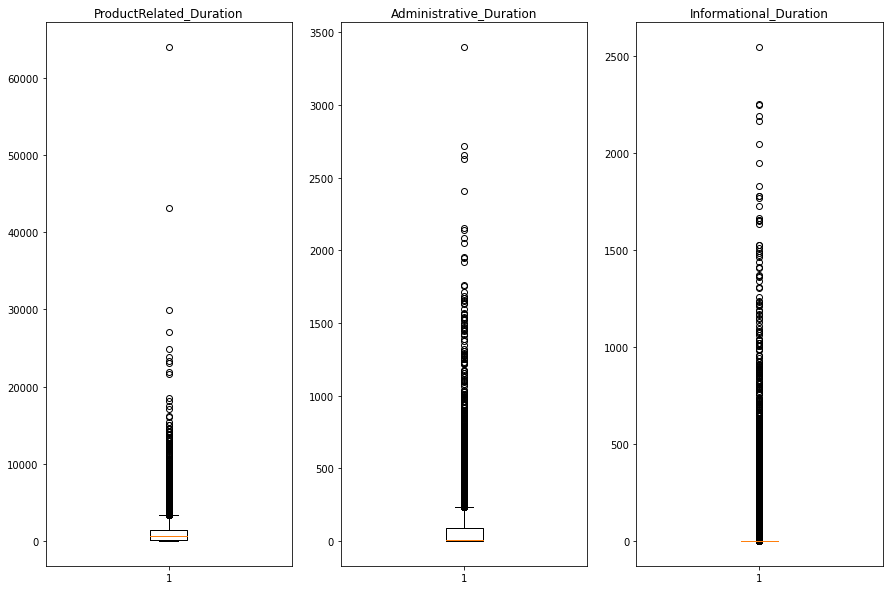

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,10))

ax1.boxplot(dataset["ProductRelated_Duration"])
ax1.set_title("ProductRelated_Duration")
ax2.boxplot(dataset["Administrative_Duration"])
ax2.set_title("Administrative_Duration")
ax3.boxplot(dataset["Informational_Duration"])
ax3.set_title("Informational_Duration")

plt.show()

### IQR metoda

In [16]:
Q1_pd = new_dataset['ProductRelated_Duration'].quantile(0.25)
Q3_pd = new_dataset['ProductRelated_Duration'].quantile(0.75)
IQR_pd = Q3_pd - Q1_pd
upper_limit_prod_dur = Q3_pd + (1.5*IQR_pd)

In [17]:
Q1_ad = new_dataset['Administrative_Duration'].quantile(0.25)
Q3_ad = new_dataset['Administrative_Duration'].quantile(0.75)
IQR_ad = Q3_ad - Q1_ad
upper_limit_admin_dur = Q3_ad + (1.5*IQR_ad)

In [18]:
Q1_id = new_dataset['Informational_Duration'].quantile(0.25)
Q3_id = new_dataset['Informational_Duration'].quantile(0.75)
IQR_id = Q3_id - Q1_id
upper_limit_info_dur = Q3_id + (1.5*IQR_id)

### Elementi van granica u procentima koristeci IQR metodu

In [19]:
e = new_dataset[new_dataset.ProductRelated_Duration>upper_limit_prod_dur].shape[0]
f = new_dataset.shape[0]
print("ProductRelated_Duration outliers: {} in percent: {}".format(e, (e/f)*100))
c = new_dataset[new_dataset.Administrative_Duration>upper_limit_admin_dur].shape[0]
d = new_dataset.shape[0]
print("Administrative_Duration outliers: {} in percent: {}".format(c, (c/d)*100))
a = new_dataset[new_dataset.Informational_Duration>upper_limit_info_dur].shape[0]
b = new_dataset.shape[0]
print("Informational_Duration outliers: {} in percent: {}" .format(a, (a/b)*100))

ProductRelated_Duration outliers: 961 in percent: 7.793998377939984
Administrative_Duration outliers: 1172 in percent: 9.505271695052716
Informational_Duration outliers: 2405 in percent: 19.505271695052716


In [20]:
# Vidimo da bismo IQR metodom izgubili dosta informacija tako da je necemo koristiti

### Uklanjamo samo ekstremne elemente izvan igranica

In [21]:
new_dataset[new_dataset.ProductRelated_Duration > 20000]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated_Duration,ExitRates,PageValues,SpecialDay,Revenue,Month_Aug,...,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
5152,17,2629.253968,24,2050.433333,43171.23338,0.015431,0.763829,0.0,0,0,...,0,0,0,0,0,0,0,1,0,1
5916,12,245.733333,4,1511.700000,21857.04648,0.012498,11.439233,0.0,0,0,...,0,0,0,0,0,0,0,1,1,0
6165,10,2407.423810,3,434.300000,23050.10414,0.011249,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,1,1,0
6684,20,199.456273,7,299.033333,23342.08205,0.022771,0.150650,0.0,0,1,...,0,0,0,0,0,0,0,1,1,0
7662,10,1251.200000,7,250.000000,23888.81000,0.027062,1.033757,0.0,0,0,...,0,0,0,0,0,0,0,1,1,0
8071,5,3398.750000,6,2549.375000,63973.52223,0.027701,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,1,1,0
8308,27,853.735949,2,126.500000,24844.15620,0.009347,4.511100,0.0,0,0,...,0,0,0,0,0,0,0,1,1,0
8784,20,1307.675000,3,132.666667,27009.85943,0.014594,8.403164,0.0,1,0,...,0,0,0,0,0,0,0,1,1,0
8972,11,631.416667,5,1037.150000,21672.24425,0.014292,9.131387,0.0,1,0,...,0,0,0,0,0,0,0,1,1,0
9238,15,2657.318056,13,1949.166667,29970.46597,0.028971,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [22]:
new_dataset[new_dataset.Administrative_Duration > 2400]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated_Duration,ExitRates,PageValues,SpecialDay,Revenue,Month_Aug,...,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
5152,17,2629.253968,24,2050.433333,43171.233380,0.015431,0.763829,0.0,0,0,...,0,0,0,0,0,0,0,1,0,1
5776,7,2720.500000,3,353.400000,5943.547619,0.038623,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,1,1,0
6165,10,2407.423810,3,434.300000,23050.104140,0.011249,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,1,1,0
8071,5,3398.750000,6,2549.375000,63973.522230,0.027701,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,1,1,0
9238,15,2657.318056,13,1949.166667,29970.465970,0.028971,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [23]:
new_dataset[new_dataset.Informational_Duration > 2000]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated_Duration,ExitRates,PageValues,SpecialDay,Revenue,Month_Aug,...,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
5152,17,2629.253968,24,2050.433333,43171.233380,0.015431,0.763829,0.0,0,0,...,0,0,0,0,0,0,0,1,0,1
5512,3,28.800000,5,2195.300000,378.400000,0.030864,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,1,1,0
6020,8,116.972222,9,2252.033333,1135.880556,0.011842,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,1,0,1
8071,5,3398.750000,6,2549.375000,63973.522230,0.027701,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,1,1,0
10302,4,367.000000,5,2256.916667,8981.580128,0.043302,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,1,1,0
11470,8,145.100000,6,2166.500000,1805.425000,0.031138,10.900234,0.0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [24]:
new_dataset = new_dataset[new_dataset['ProductRelated_Duration'] < 20000]
new_dataset = new_dataset[new_dataset['Administrative_Duration'] < 2400]
new_dataset = new_dataset[new_dataset['Informational_Duration'] < 1900]

### Negativne vredosti su primecene u kolonama veznaim za vreme provedeno na stranicama, posto ove vrednosti ne mogu biti negativne bice zamenjene sa 0

In [25]:
new_dataset.loc[new_dataset.Administrative_Duration<0, 'Administrative_Duration'] = 0
new_dataset.loc[new_dataset.Informational_Duration<0, 'Informational_Duration'] = 0
new_dataset.loc[new_dataset.ProductRelated_Duration<0, 'ProductRelated_Duration'] = 0

### Podela na ulazne i ciljane podatke

In [26]:
X = new_dataset.drop(columns=['Revenue'])
y = new_dataset['Revenue']

### Podela skupa na train i test


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7, test_size=0.3, stratify = y)
X_train_original = pd.DataFrame(X_train, columns = X.columns)

### Standardizacija


In [28]:
stand = StandardScaler()
X_train_scaled = stand.fit_transform(X_train)
X_test_scaled = stand.transform(X_test)

In [29]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X.columns)
X_train_scaled.shape

(8620, 73)

In [30]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X.columns)
X_test_scaled.shape

(3695, 73)

### Prikaz nekih atributa pre i posle standardizacije


[Text(0.5, 0, ''), Text(0, 0.5, '')]

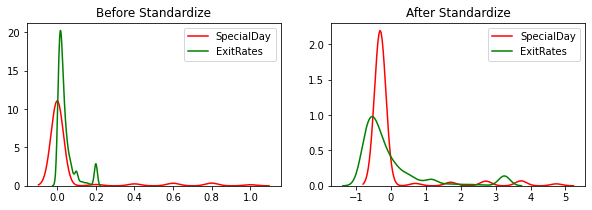

In [31]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,3))

sns.kdeplot(X_train_original['SpecialDay'], ax=ax1, label='SpecialDay', color='r')
sns.kdeplot(X_train_original['ExitRates'], ax=ax1, label='ExitRates', color='g')
ax1.set_title('Before Standardize')
ax1.legend(loc="upper right")
ax1.set(xlabel=None, ylabel=None)

sns.kdeplot(X_train_scaled['SpecialDay'], ax=ax2, label='SpecialDay', color='r')
sns.kdeplot(X_train_scaled['ExitRates'], ax=ax2, label='ExitRates', color='g')
ax2.set_title('After Standardize')
ax2.legend(loc="upper right")
ax2.set(xlabel=None, ylabel=None)

### Cuvamo podatke za clasifikaciju i klasterovanje

In [32]:
dump((X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled), 'classification_preprocessed.joblib')

['classification_preprocessed.joblib']

In [33]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [34]:
dump((X_scaled, X), 'clustering_preprocessed.joblib')

['clustering_preprocessed.joblib']

In [35]:
new_dataset.to_csv('../dataset/preprocessed.csv', index=False)

In [36]:
pp = pd.read_csv('../dataset/preprocessed.csv')
pp

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated_Duration,ExitRates,PageValues,SpecialDay,Revenue,Month_Aug,...,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
0,0,0.0,0,0.0,0.000000,0.200000,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0.0,0,0.0,64.000000,0.100000,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,0,0.0,0,0.0,0.000000,0.200000,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,0.0,0,0.0,2.666667,0.140000,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,0,0.0,0,0.0,627.500000,0.050000,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12310,3,145.0,0,0.0,1783.791667,0.029031,12.241717,0.0,0,0,...,0,0,0,0,0,0,0,1,0,1
12311,0,0.0,0,0.0,465.750000,0.021333,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,1,0,1
12312,0,0.0,0,0.0,184.250000,0.086667,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,1,0,1
12313,4,75.0,0,0.0,346.000000,0.021053,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,1,1,0
